In [93]:
import pooch
from skimage import io
import matplotlib.pyplot as plt
import matplotlib
from skimage.metrics import structural_similarity
from skimage.color import rgb2gray

In [113]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

In [75]:
image_paths = pooch.retrieve(
    url="http://127.0.0.1:8000/image/2023-06-30.zip",
    known_hash="0a910a8b485b5a202fa24b82a0dec2bbdf0408825874241c984d60417bbbc6ea",
    processor=pooch.Unzip()
)
image_paths = sorted(image_paths)
image_paths[0:5]

['/Users/vincent/Library/Caches/pooch/e60c28554f8173eaaab4666d608e5e4c-2023-06-30.zip.unzip/2023-06-30_0000.jpg',
 '/Users/vincent/Library/Caches/pooch/e60c28554f8173eaaab4666d608e5e4c-2023-06-30.zip.unzip/2023-06-30_0001.jpg',
 '/Users/vincent/Library/Caches/pooch/e60c28554f8173eaaab4666d608e5e4c-2023-06-30.zip.unzip/2023-06-30_0002.jpg',
 '/Users/vincent/Library/Caches/pooch/e60c28554f8173eaaab4666d608e5e4c-2023-06-30.zip.unzip/2023-06-30_0003.jpg',
 '/Users/vincent/Library/Caches/pooch/e60c28554f8173eaaab4666d608e5e4c-2023-06-30.zip.unzip/2023-06-30_0004.jpg']

In [76]:
image_paths_ten_o_clock = pooch.retrieve(
    url="http://127.0.0.1:8000/zip/stream/2023-06-30_22",
    known_hash="b31326bea34989b04cc11d44f1522b833e2a6a46c56074dec2405a5d9f59577e",
    processor=pooch.Unzip()
)
image_paths_ten_o_clock = sorted(image_paths_ten_o_clock)
image_paths_ten_o_clock[0:5]

['/Users/vincent/Library/Caches/pooch/094e12e4f96af0b27c6495cfd12f85ec-2023-06-30_22.unzip/2023-06-30_2200.jpg',
 '/Users/vincent/Library/Caches/pooch/094e12e4f96af0b27c6495cfd12f85ec-2023-06-30_22.unzip/2023-06-30_2201.jpg',
 '/Users/vincent/Library/Caches/pooch/094e12e4f96af0b27c6495cfd12f85ec-2023-06-30_22.unzip/2023-06-30_2202.jpg',
 '/Users/vincent/Library/Caches/pooch/094e12e4f96af0b27c6495cfd12f85ec-2023-06-30_22.unzip/2023-06-30_2203.jpg',
 '/Users/vincent/Library/Caches/pooch/094e12e4f96af0b27c6495cfd12f85ec-2023-06-30_22.unzip/2023-06-30_2204.jpg']

In [79]:
images = []

for filename in image_paths:
    images.append(io.imread(filename))
    
len(images)

1426

In [85]:
images[0].shape

(768, 1024, 3)

In [144]:
before_image = rgb2gray(images[0])
after_image = rgb2gray(images[20])

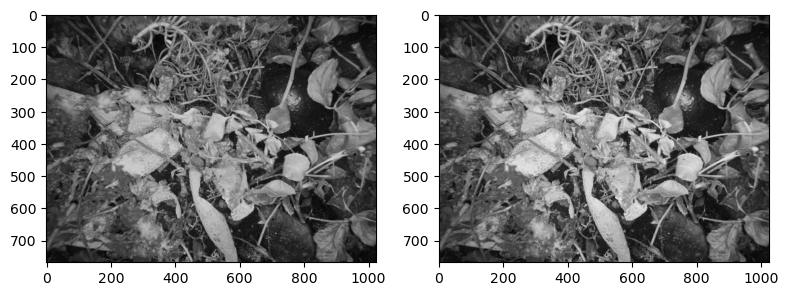

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(before_image, cmap="gray")
ax[1].imshow(after_image, cmap="gray")

fig.tight_layout()
plt.show()

In [151]:
(score, diff) = structural_similarity(before_image, after_image, data_range=before_image.max() - after_image.min(), full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

Image Similarity: 87.2231%


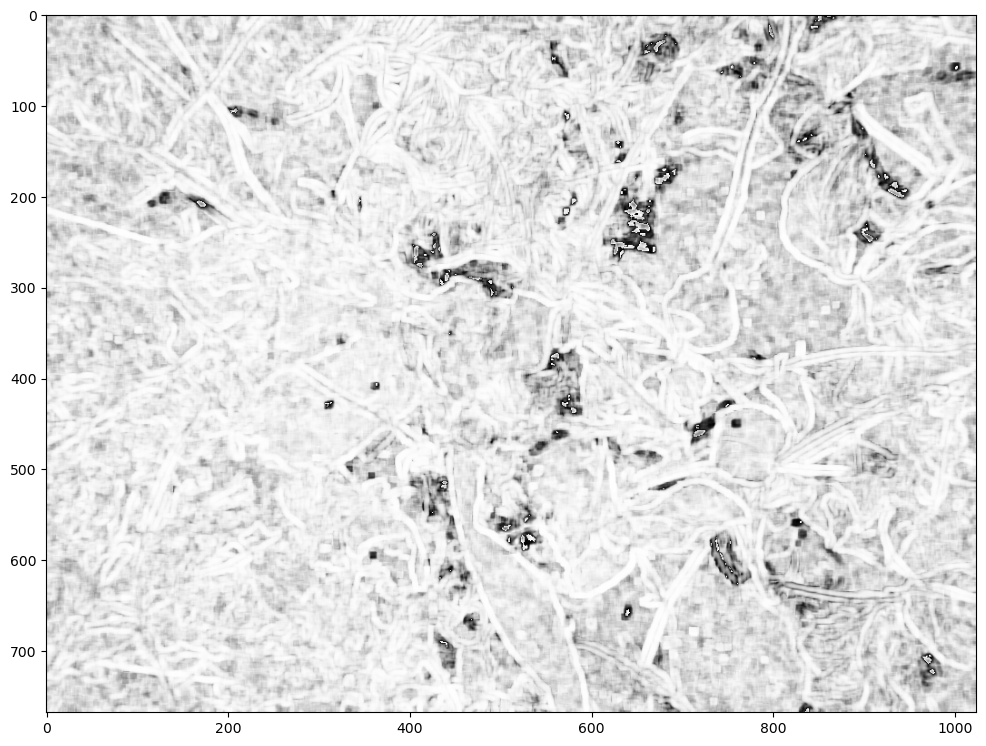

In [152]:
diff = (diff * 255).astype("uint8")
display(diff, cmap="gray")